<a href="https://colab.research.google.com/github/Madhuraangchekar/BetterSmarterFasterCircleOfLife/blob/master/mdm_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MDM - Project 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Data manipulation
import numpy as np
import pandas as pd
import re

# Data visualization
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Style
import matplotlib.style as style
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
sns.set(style="whitegrid")
sns.set_style("dark")

<ipython-input-5-e0b87516461e>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-pastel')


In [6]:
movies = pd.read_csv('drive/MyDrive/MDM/movies.csv')
ratings = pd.read_csv('drive/MyDrive/MDM/ratings.csv')
tags = pd.read_csv('drive/MyDrive/MDM/tags.csv')
print('movies: ', movies.shape)
print('ratings: ', ratings.shape)
print('tags: ', tags.shape)

movies:  (9742, 3)
ratings:  (100836, 4)
tags:  (3683, 4)


In [7]:
print(movies.head())
print(ratings.head())
print(tags.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferre

**Preprocessing**

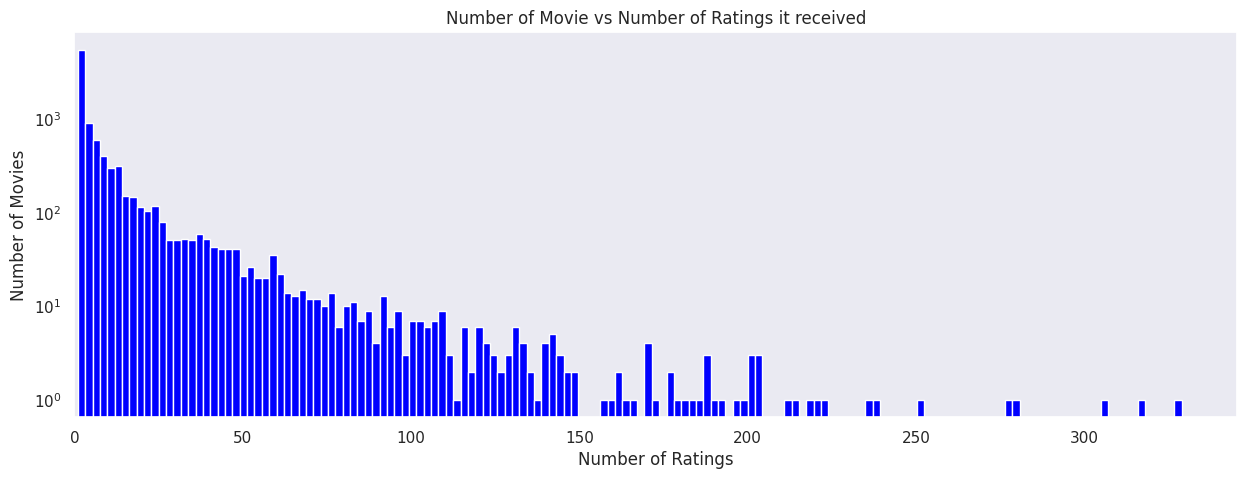

In [8]:
subset = ratings.groupby(by="movieId").size().to_frame('numRating').reset_index().sort_values(by=['numRating'], ascending = False)
# dftmp = subset.sort_values(by=['numRating'], ascending = False)
plt.figure(figsize=(15,5))
plt.hist(subset.numRating, bins=150, color='blue', log=True)
plt.title('Number of Movie vs Number of Ratings it received')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.xlim(0,)
plt.show()

In [9]:
movie_ratings = ratings.merge( movies, on='movieId' , how='left')
movie_ratings['genres'] = movie_ratings['genres'].str.split('|')
# movie_ratings.head(5)

In [10]:
genres_unique = pd.DataFrame(movie_ratings['genres'].tolist()).stack().unique()
genres_unique = pd.DataFrame(genres_unique, columns=['genres'])
genres_unique['No of movies'] = 0
for i in movie_ratings['genres']:
  genres_unique.loc[genres_unique['genres'].isin(i),'No of movies']+=1
print(genres_unique)

                genres  No of movies
0            Adventure         24161
1            Animation          6988
2             Children          9208
3               Comedy         39053
4              Fantasy         11834
5              Romance         18124
6               Action         30635
7                Crime         16681
8             Thriller         26452
9              Mystery          7674
10              Horror          7291
11               Drama         41928
12                 War          4859
13             Western          1930
14              Sci-Fi         17243
15             Musical          4138
16           Film-Noir           870
17                IMAX          4145
18         Documentary          1219
19  (no genres listed)            47


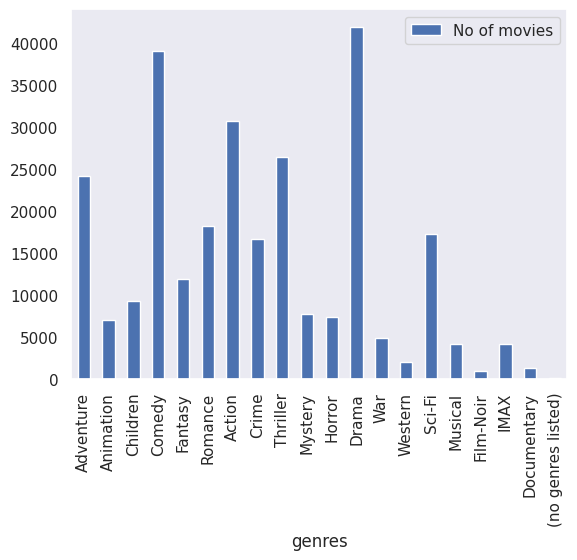

In [11]:
ax = genres_unique.plot.bar(y='No of movies', x='genres')
# make the graph horizontal instead
# sorted in ascending or descending order 
# the gener should appear on the bar 
# remove the 

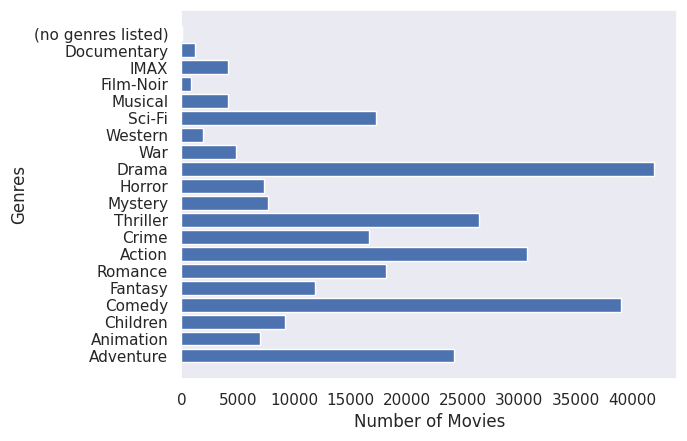

In [20]:
# Create a horizontal bar chart
plt.barh(genres_unique['genres'], genres_unique['No of movies'])

# Set the x-axis label
plt.xlabel('Number of Movies')

# Set the y-axis label
plt.ylabel('Genres')

# Show the plot
plt.show()